## TE N°1 TDR Ex 3

## 1) Importer les outils

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
import scipy.integrate as solveur

## 2) Définir les constantes du problème

In [0]:
CA0 = 1.5 # mol/l
CB0 = 2.0 # mol/l
Vdot = 10 #l/min

## 3) Définir les équations à résoudre

In [0]:
def equations (variables, V, Vdot) :
  NA, NB, NC, ND, NE, NF = variables
  
  
  CA = NA/Vdot
  CB = NB/Vdot
  CC = NC/Vdot
  CD = ND/Vdot
  CE = NE/Vdot
  CF = NF/Vdot
    
  r1 = 0.25 * CA * CB
  r2 = 0.1 * CA * CD
  r3 = 5 * (CB**2) * CC
  
  RA = - r1 - (3 * r2)
  RB = - (2 * r1) - r3
  RC = r1 + r2 - (2 * r3)
  RD = r1 - (2 * r2) + r3
  RE = r2
  RF = r3
  
  dNAdV = RA 
  dNBdV = RB 
  dNCdV = RC 
  dNDdV = RD 
  dNEdV = RE
  dNFdV = RF
  
  
  return dNAdV, dNBdV, dNCdV, dNDdV, dNEdV, dNFdV

## 4) Définir les conditions initiales

In [0]:
conditions_initiales = [CA0 * Vdot, CB0 * Vdot, 0, 0, 0, 0]

In [0]:
V = np.linspace(0, 50, 51) # définir les bornes d'intégration / on peut utiliser 'arrange'(0, 40.01, 0.01) => integration(debut , fint, dt) pour avoire tout les detaill entre 0 et 40s => definition

resultats = solveur.odeint(
    equations, 
    conditions_initiales,
    V,
    (Vdot,)) # 1 constante => mettre une virgule

In [0]:
N1 = resultats [:,0] # [ : => toute les colone, 0 => je comence a 0(1er colonne)]

## 5) Résoudre le problème à l'aide du solveur

In [0]:
NA = resultats [:,0]

NA0 = CA0 * Vdot
x = (NA0 - NA) / NA0

## 6) Visualiser les résultats

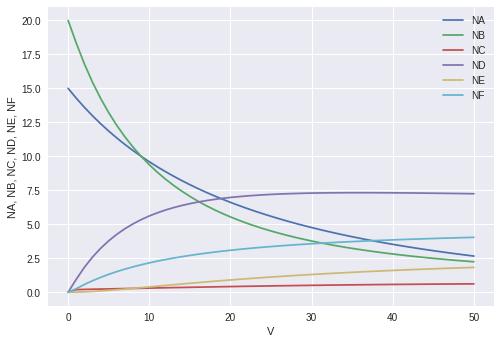

In [10]:
plt.plot(V,resultats)
plt.xlabel("V")
plt.ylabel("NA, NB, NC, ND, NE, NF")
plt.legend(["NA", "NB", "NC", "ND", "NE", "NF"])
plt.show()

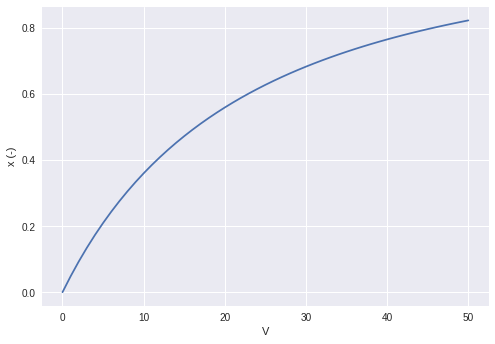

In [11]:
plt.plot(V, x)
plt.xlabel("V")
plt.ylabel("x (-)")
plt.show()

In [12]:
x[V < 50] [-1] # valeur superieur ou inferieur

0.817780327470462

In [0]:
 # comment extraire une concentration des reultatas...